# Prototyping - Image templating 

*Background*: Collection of 2d crystals is currently a very manual process. After identifying the desired sample on a high resolution microscope, the sample is transfered to a lower resolution scope for actual processing. Relocating the sample is currently a laborious and manual process.

*Purpose*: The purpose of this notebook is to investigate ways to locate the sample in question in an automated fashion.

*Problem Statement*: Given two images collected on different microscopes, identify the location of the `template` image in the `target` image.



ref:
 - https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_template.html
 - https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

In [148]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.feature import match_template
from PIL import Image



In [149]:
def load_image(filename, downscale_factor = 1) :
    img = Image.open( filename )
    if(downscale_factor > 1):
        img = img.resize((img.size[0]//downscale_factor, img.size[1]//downscale_factor))
    data = np.asarray( img, dtype="int32" )
    return data

# Observations:
Manual observations of pair samples using GIMP reveal the following:
    
 - Although the template and target images are the same resolution, the template image is an almost exact match for the target when scaled down 5x.
 - Due to the virtually exact match between the target and template when rescaled, template matching (as opposed to feature matching) approaches may be ideal for identifying the location of the template within the target image.

In [196]:
examples_dir = "../static/examples"

In [197]:
# Image template algorithm is slow. downscaling will help with performance.
downscale=2 
template = load_image(os.path.join(examples_dir, '1 H_Z.jpg'), downscale_factor=5*downscale)
target = load_image(os.path.join(examples_dir, '1 H.jpg'), downscale_factor=1*downscale)

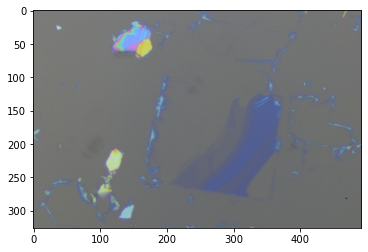

In [187]:
plt.imshow(template)

In [188]:
target.shape

(1632, 2464, 3)

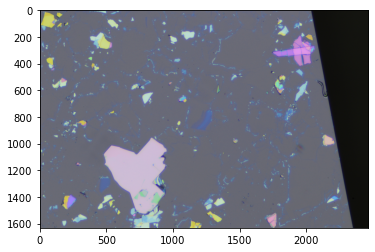

In [189]:
plt.imshow(target)

In [190]:
match = match_template(target, template)

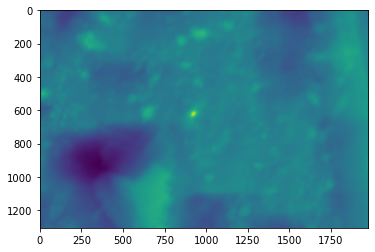

In [191]:
plt.imshow(match)

In [192]:
ij = np.unravel_index(np.argmax(match), match.shape)

In [193]:
ij

(622, 919, 0)

In [194]:
y,x = ij[0],ij[1]

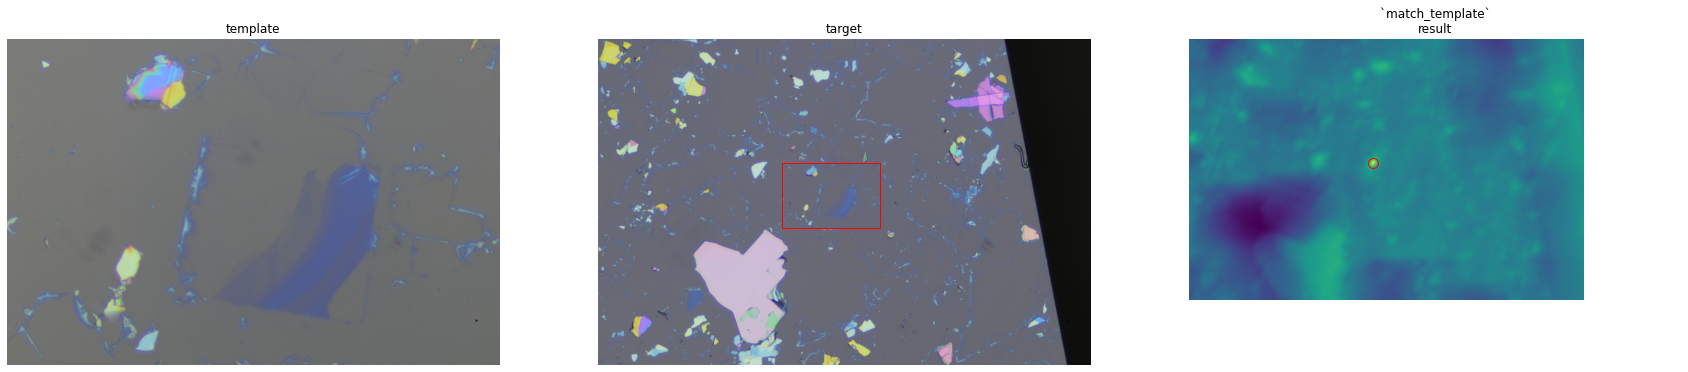

In [195]:
fig = plt.figure(figsize=(30, 10))

ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(template, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(target, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('target')
# highlight matched region
htemplate, wtemplate, _ = template.shape
rect = plt.Rectangle((x, y), wtemplate, htemplate, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(match)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()